# **CNN Image Classification for Car Classification**

In today's digital age, visual data is abundant, and extracting meaningful information from images is crucial for various applications. One such application is the classification of cars based on their images, which holds significant importance in industries ranging from automotive manufacturing to traffic management.

In this notebook, we'll use Convolutional Neural Networks (CNNs) to tackle the task of classifying cars into different categories based on their images. CNNs have emerged as powerful tools for image recognition tasks, thanks to their ability to automatically learn relevant features from raw pixel data.

## Dataset

We'll be using a [dataset](https://www.kaggle.com/datasets/eimadevyni/car-model-variants-and-images-dataset) containing a diverse collection of car images, each belonging to a specific make, model, or category. This dataset provides us with a rich source of visual information for training and evaluating our CNN-based classification model.

## Objective

Our primary objective is to develop an accurate CNN model capable of classifying cars into distinct classes (luxury or massmarket) based solely on their visual features. By harnessing the power of deep learning, we aim to automate the process of car classification and enable precise identification of different car types from images.

## Methodology

Our approach to CNN-based car classification involves the following key steps:

1. **Feature Engineering and Image Preprocessing**: We'll perform feature engineering on the daraset and will preprocess the car images by resizing, normalizing, and augmenting them to ensure uniformity and improve model generalization.

2. **Model Architecture**: We'll design a CNN architecture tailored specifically for car classification. This architecture will comprise multiple convolutional layers followed by pooling layers, enabling the model to extract hierarchical features from the input images.

3. **Model Training**: Using the preprocessed image data, we'll train our CNN model on a labeled dataset of car images. During training, the model will learn to associate visual patterns with corresponding car classes through backpropagation and gradient descent.

4. **Evaluation and Fine-Tuning**: We'll evaluate the performance of our trained model on a separate validation dataset, measuring metrics such as accuracy, precision, recall, and F1-score. Additionally, we may fine-tune the model parameters using hyperparameter tuning.

By the end of this notebook, you'll gain a comprehensive understanding of how CNNs can be used for image classification tasks, particularly in the context of categorizing cars based on their visual attributes. Let's embark on this journey to unlock the potential of CNN image classification for car classification tasks!

Let's get started!

# Import Libraries

In [1]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
- I'll be importing the data using the Kaggle API
- The data will be stored in the /content/ folder on Google Colab
- The data consistd of three items:
  - Test folder
  - Train folder
  - CSV file containing the dataset

In [3]:
from google.colab import files
# Uploading Kaggle API token JSON file
uploaded = files.upload()

# Moving the Kaggle API credentials file to the appropriate location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

import kaggle
# Specifying the dataset to download
dataset_name = 'eimadevyni/car-model-variants-and-images-dataset' #can be found in url

# Setting the directory for downloading the dataset
download_dir = '/content/'

# Downloading the dataset
kaggle.api.dataset_download_files(dataset_name, path=download_dir,unzip=True)



Saving kaggle.json to kaggle.json


Viewing the DataFrame:

## 1. Read the CSV File
I'll be reading the data from the included CSV file into a DataFrame:

In [4]:
import pandas as pd
data = pd.read_csv(r"/content/data_full.csv")

### Viewing the dataframe

In [5]:
data.head()

,brand,model,production_years,from_year,to_year,body_style,segment,title,description,engine_specs_title,...,city,ground_clearance,gross_weight_limit,brand_url,brand_logo_url,model_url,image_urls,image_file_names,dir_path,total_images
0,AC,AC 428 Convertible,"1966, 1967, 1968, 1969, 1970, 1971",1966,1971,"Convertible (spider/spyder, cabrio/cabriolet, ...",Coupe Cabrio,AC 428 Convertible 19661971,"In 1966, AC cut a deal with the Italian coachb...",7.0L V8 3AT (350 HP),...,NaN,6 in (152 mm),NaN,https://www.autoevolution.com/ac/,https://s1.cdn.autoevolution.com/images/produc...,https://www.autoevolution.com/cars/ac-428-conv...,https://s1.cdn.autoevolution.com/images/galler...,"['ac-428-convertible-1966-7054_1.jpg', 'ac-428...",images/AC/AC__428_Convertible/19661971,24
1,ACURA,ACURA MDX,"2021, 2022, 2023",2001,2024,SUV (Sports Utility Vehicle),Medium SUV,ACURA MDX 2021Present,"Reaching the 4th generation, the MDX became th...",3.5L V6 10AT (290 HP),...,19 mpg US (12.4 L/100Km),7.3 in (185 mm),NaN,https://www.autoevolution.com/acura/,https://s1.cdn.autoevolution.com/images/produc...,https://www.autoevolution.com/cars/acura-mdx-2...,https://s1.cdn.autoevolution.com/images/galler...,"['acura-mdx-2021-6991_15.jpg', 'acura-mdx-2021...",images/ACURA/ACURA_MDX/2021Present,33
2,ACURA,ACURA MDX ASpec,"2018, 2019, 2020, 2021, 2022, 2023",2001,2024,SUV (Sports Utility Vehicle),Medium SUV,ACURA MDX ASpec 2018Present,Acura unveiled the 2019 MDX model in late 2018...,3.5L V6 9AT AWD (290 HP),...,18 mpg US (13.1 L/100Km),7.3 in (185 mm),NaN,https://www.autoevolution.com/acura/,https://s1.cdn.autoevolution.com/images/produc...,https://www.autoevolution.com/cars/acura-mdx-a...,https://s1.cdn.autoevolution.com/images/galler...,"['ACURA-MDX-A-Spec-6304_1.jpg', 'ACURA-MDX-A-S...",images/ACURA/ACURA_MDX_ASpec/2018Present,48
3,ACURA,ACURA MDX,"2013, 2014, 2015, 2016",2001,2024,SUV (Sports Utility Vehicle),Medium SUV,ACURA MDX 20132016,The 2014 Acura MDX is built on an entirely new...,3.5L V6 6AT (294 HP),...,20 mpg US (11.8 L/100Km),NaN,NaN,https://www.autoevolution.com/acura/,https://s1.cdn.autoevolution.com/images/produc...,https://www.autoevolution.com/cars/acura-mdx-2...,https://s1.cdn.autoevolution.com/images/galler...,"['ACURA-MDX-4836_1.jpg', 'ACURA-MDX-4836_2.jpg...",images/ACURA/ACURA_MDX/20132016,37
4,ACURA,ACURA MDX,"2010, 2011, 2012, 2013",2001,2024,SUV (Sports Utility Vehicle),Medium SUV,ACURA MDX 20102013,The Acura MDX was already a technologically ad...,3.7L V6 AWD 6AT (300 HP),...,16 mpg US (14.7 L/100Km),8.2 in (208 mm),5790 lbs (2626 kg),https://www.autoevolution.com/acura/,https://s1.cdn.autoevolution.com/images/produc...,https://www.autoevolution.com/cars/acura-mdx-2...,https://s1.cdn.autoevolution.com/images/galler...,"['ACURAMDX-4382_1.jpg', 'ACURAMDX-4382_2.jpg',...",images/ACURA/ACURA_MDX/20102013,41


In [6]:
data2=data.copy()

Viewing the columns:

In [7]:
data.columns

Index(['brand', 'model', 'production_years', 'from_year', 'to_year',
       'body_style', 'segment', 'title', 'description', 'engine_specs_title',
       'cylinders', 'displacement', 'power', 'torque', 'fuel_system', 'fuel',
       'fuel_capacity', 'top_speed', 'drive_type', 'gearbox', 'front', 'rear',
       'tire_size', 'length', 'width', 'height', 'front_rear_track',
       'wheelbase', 'cargo_volume', 'unladen_weight', 'highway', 'combined',
       'acceleration', 'aerodynamics', 'city', 'ground_clearance',
       'gross_weight_limit', 'brand_url', 'brand_logo_url', 'model_url',
       'image_urls', 'image_file_names', 'dir_path', 'total_images'],
      dtype='object')

The DataFrame has 40 features

### Dropping Unnecessary Features
In the Data, I'm only interested in the brand names, image file name and the url location of the image, so I'll drop the other columns:

In [8]:
data.drop(['model', 'production_years', 'from_year', 'to_year',
       'body_style', 'segment', 'title', 'description', 'engine_specs_title',
       'cylinders', 'displacement', 'power', 'torque', 'fuel_system', 'fuel',
       'fuel_capacity', 'top_speed', 'drive_type', 'gearbox', 'front', 'rear',
       'tire_size', 'length', 'width', 'height', 'front_rear_track',
       'wheelbase', 'cargo_volume', 'unladen_weight', 'highway', 'combined',
       'acceleration', 'aerodynamics', 'city', 'ground_clearance',
       'gross_weight_limit', 'brand_url', 'brand_logo_url', 'model_url',
       'image_urls', 'dir_path', 'total_images'], axis=1, inplace=True)

In [9]:
data.head()

,brand,image_file_names
0,AC,"['ac-428-convertible-1966-7054_1.jpg', 'ac-428..."
1,ACURA,"['acura-mdx-2021-6991_15.jpg', 'acura-mdx-2021..."
2,ACURA,"['ACURA-MDX-A-Spec-6304_1.jpg', 'ACURA-MDX-A-S..."
3,ACURA,"['ACURA-MDX-4836_1.jpg', 'ACURA-MDX-4836_2.jpg..."
4,ACURA,"['ACURAMDX-4382_1.jpg', 'ACURAMDX-4382_2.jpg',..."


There are now two columns.

### Editing image_file_names column
The image_file_name column is in the form of a string representation of lists
- I will be converting so that each image is in its own row
- I will first remove the square brackets and quotation marks
- I will then split the data into separate rows with the corresponding brand

##### **Removing Brackets and Quotation Marks**




In [10]:
import ast

#creating a new DataFrame
data_new= pd.DataFrame()

# Converting the string representation of lists to actual lists using ast.literal_eval
data_new['image_file_names'] = data['image_file_names'].apply(ast.literal_eval)

# Removing square brackets and quotation marks
data_new['image_file_names_no_brac'] = data_new['image_file_names'].apply(lambda x: ', '.join(x))

data_new.head()

,image_file_names,image_file_names_no_brac
0,"[ac-428-convertible-1966-7054_1.jpg, ac-428-co...","ac-428-convertible-1966-7054_1.jpg, ac-428-con..."
1,"[acura-mdx-2021-6991_15.jpg, acura-mdx-2021-69...","acura-mdx-2021-6991_15.jpg, acura-mdx-2021-699..."
2,"[ACURA-MDX-A-Spec-6304_1.jpg, ACURA-MDX-A-Spec...","ACURA-MDX-A-Spec-6304_1.jpg, ACURA-MDX-A-Spec-..."
3,"[ACURA-MDX-4836_1.jpg, ACURA-MDX-4836_2.jpg, A...","ACURA-MDX-4836_1.jpg, ACURA-MDX-4836_2.jpg, AC..."
4,"[ACURAMDX-4382_1.jpg, ACURAMDX-4382_2.jpg, ACU...","ACURAMDX-4382_1.jpg, ACURAMDX-4382_2.jpg, ACUR..."


Dropping the image_file_names column

In [11]:
data_new.drop('image_file_names', axis=1, inplace=True)


Adding in the brand names from the 'data2' DataFrame:

In [13]:
data_new['brand'] = data['brand']
data_new['image_link'] =data2['dir_path']

In [14]:
data_new.head()

,image_file_names_no_brac,brand,image_link
0,"ac-428-convertible-1966-7054_1.jpg, ac-428-con...",AC,images/AC/AC__428_Convertible/19661971
1,"acura-mdx-2021-6991_15.jpg, acura-mdx-2021-699...",ACURA,images/ACURA/ACURA_MDX/2021Present
2,"ACURA-MDX-A-Spec-6304_1.jpg, ACURA-MDX-A-Spec-...",ACURA,images/ACURA/ACURA_MDX_ASpec/2018Present
3,"ACURA-MDX-4836_1.jpg, ACURA-MDX-4836_2.jpg, AC...",ACURA,images/ACURA/ACURA_MDX/20132016
4,"ACURAMDX-4382_1.jpg, ACURAMDX-4382_2.jpg, ACUR...",ACURA,images/ACURA/ACURA_MDX/20102013


##### **Splitting the Values into Separate Rows**

I will then split the data into separate rows with the corresponding brand

In [15]:
# Splitting the comma-separated values into separate rows and associating with the corresponding brand
data_new = data_new.assign(image_file_names_no_brac=data_new['image_file_names_no_brac'].str.split(', ')).explode('image_file_names_no_brac')
data_new.head()


,image_file_names_no_brac,brand,image_link
0,ac-428-convertible-1966-7054_1.jpg,AC,images/AC/AC__428_Convertible/19661971
0,ac-428-convertible-1966-7054_2.jpg,AC,images/AC/AC__428_Convertible/19661971
0,ac-428-convertible-1966-7054_3.jpg,AC,images/AC/AC__428_Convertible/19661971
0,ac-428-convertible-1966-7054_4.jpg,AC,images/AC/AC__428_Convertible/19661971
0,ac-428-convertible-1966-7054_5.jpg,AC,images/AC/AC__428_Convertible/19661971


In [16]:
data_new.shape

(194727, 3)

There are now 194,727 rows

Renaming the column:

In [17]:
data_new.rename(columns={'image_file_names_no_brac': 'image_filename'}, inplace=True)

In [18]:
data_new.head()

,image_filename,brand,image_link
0,ac-428-convertible-1966-7054_1.jpg,AC,images/AC/AC__428_Convertible/19661971
0,ac-428-convertible-1966-7054_2.jpg,AC,images/AC/AC__428_Convertible/19661971
0,ac-428-convertible-1966-7054_3.jpg,AC,images/AC/AC__428_Convertible/19661971
0,ac-428-convertible-1966-7054_4.jpg,AC,images/AC/AC__428_Convertible/19661971
0,ac-428-convertible-1966-7054_5.jpg,AC,images/AC/AC__428_Convertible/19661971


I now have the Required Columns:
- The image file name
- The brand
- The image url

But the image url will not work, since the paths do not exist in the folder.

So I will have to manually retrieve the image urls from the /contents/train/ folder

## 2. Retrieving Data & Creating a DataFrame
- I'll be getting the data from the /content/train/ folder
- I will then create a DataFrame 'df' to store the data. The retrieved data will include the image url and the file name.
- This way, I will be able to merge this dataframe with the previous one on 'image file name', and I'll end up with a dataframe containg the correct image url.

In [19]:
import os
# Setting the path to the directory containing subfolders
base_path = '/content/train/'

# Initialising the lists for storing the data
image_paths = []
image_urls = []
image_filenames = []
class_labels = []

# Iterating through subfolders
for class_label in os.listdir(base_path):
    class_path = os.path.join(base_path, class_label)

    # Skipping items not in the directory
    if not os.path.isdir(class_path):
        continue

    # Iterating through images in the subfolder
    for image_name in os.listdir(class_path):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Building the image path and URL
            image_path = os.path.join(class_path, image_name)
            image_url = f'/content/train/{class_label}/{image_name}'  # Modify this based on your actual URL structure

            # Extract image filename
            image_filename = image_name

            # Append to lists
            image_paths.append(image_path)
            image_urls.append(image_url)
            image_filenames.append(image_filename)
            class_labels.append(class_label)

# Creating a DataFrame with the retrieved data:
df = pd.DataFrame({
    'image_path': image_paths,
    'image_url': image_urls,
    'image_filename': image_filenames,  # Include image filenames in the DataFrame
    'class_label': class_labels
})



Viewing the Data:

In [20]:
df.head()

,image_path,image_url,image_filename,class_label
0,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_28.jpg,AUDI_S6_Avant_2019Present
1,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_36.jpg,AUDI_S6_Avant_2019Present
2,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_21.jpg,AUDI_S6_Avant_2019Present
3,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_17.jpg,AUDI_S6_Avant_2019Present
4,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_23.jpg,AUDI_S6_Avant_2019Present


## 3. Merging the Dataframes
- Both the dataframes 'df' and 'data' contain the column 'image_filename'
- So I will use that column to perform an inner join on the two DataFrames

In [21]:
merged_df = pd.merge(df, data_new, on='image_filename', how='inner')

Viewing the DataFrame

In [22]:
merged_df.head()

,image_path,image_url,image_filename,class_label,brand,image_link
0,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_28.jpg,AUDI_S6_Avant_2019Present,AUDI,images/AUDI/AUDI_S6_Avant/2019Present
1,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_36.jpg,AUDI_S6_Avant_2019Present,AUDI,images/AUDI/AUDI_S6_Avant/2019Present
2,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_21.jpg,AUDI_S6_Avant_2019Present,AUDI,images/AUDI/AUDI_S6_Avant/2019Present
3,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_17.jpg,AUDI_S6_Avant_2019Present,AUDI,images/AUDI/AUDI_S6_Avant/2019Present
4,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI-S6-Avant-6553_23.jpg,AUDI_S6_Avant_2019Present,AUDI,images/AUDI/AUDI_S6_Avant/2019Present


### Shape of Merged Dataframe

In [23]:
merged_df.shape

(152789, 6)

### Checking Null Values

In [24]:
merged_df.isnull().any()

image_path        False
image_url         False
image_filename    False
class_label       False
brand             False
image_link        False
dtype: bool

### Dropping Unneeded Columns

In [25]:
merged_df.drop(['image_path', 'image_filename', 'class_label', 'image_link'], axis=1, inplace=True)

In [26]:
merged_df.head()

,image_url,brand
0,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI
1,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI
2,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI
3,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI
4,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI


Now I have all the columns required:
- The brand name
- The correct image url

# EDA and Data preprocessing

## Checking Unique Brands

I'll be checking which brands are unique

In [27]:
merged_df['brand'].unique()

array(['AUDI', 'DACIA', 'PORSCHE', 'MERCEDESBENZ', 'CHEVROLET', 'NISSAN',
       'TOYOTA', 'MASERATI', 'ASTONMARTIN', 'VAUXHALL', 'ALFAROMEO',
       'VOLVO', 'FORD', 'RENAULT', 'JEEP', 'BMW', 'FERRARI', 'ACURA',
       'PAGANI', 'PEUGEOT', 'SAAB', 'MERCURY', 'HONDA', 'VOLKSWAGEN',
       'LINCOLN', 'CITROEN', 'FIAT', 'HYUNDAI', 'OPEL', 'MAZDA', 'SUBARU',
       'SUZUKI', 'BUICK', 'LAMBORGHINI', 'KIA', 'LANDROVER', 'DODGE',
       'MITSUBISHI', 'LEXUS', 'DAEWOO', 'SEAT', 'LOTUS', 'ROLLSROYCE',
       'MCLAREN', 'MercedesAMG', 'CHRYSLER', 'CADILLAC', 'SKODA',
       'SSANGYONG', 'PROTON', 'BENTLEY', 'GENESIS', 'JAGUAR', 'INFINITI',
       'SATURN', 'NIO', 'GMC', 'MAYBACH', 'SMART', 'BUGATTI', 'ISUZU',
       'HOLDEN', 'DAIHATSU', 'LANCIA', 'KTM', 'TATAMOTORS', 'MINI',
       'KOENIGSEGG', 'BRISTOL', 'WIESMANN', 'SPYKER', 'LIGHTYEAR',
       'DSAUTOMOBILES', 'MORGAN', 'SCION', 'FISKER', 'PERODUA', 'MG',
       'TESLA', 'RIMAC', 'DeLorean', 'RAMTrucks', 'CUPRA', 'PONTIAC',
       'LADA', 

#### Merging Similar Columns

- The brands MercedesAMG and MERCEDESBENZ will be merged into MERCEDESSBENZ
- MAURITUSUZUKI will be merged into SUZUKI

In [28]:
merged_df['brand'] = merged_df['brand'].replace(['MercedesAMG'], 'MERCEDESBENZ')
merged_df['brand'] = merged_df['brand'].replace(['MARUTISUZUKI'], 'SUZUKI')

### Checking Distribution of Each Brand
I'll be doing this by creating a horizontal countplot to visualize each brand.

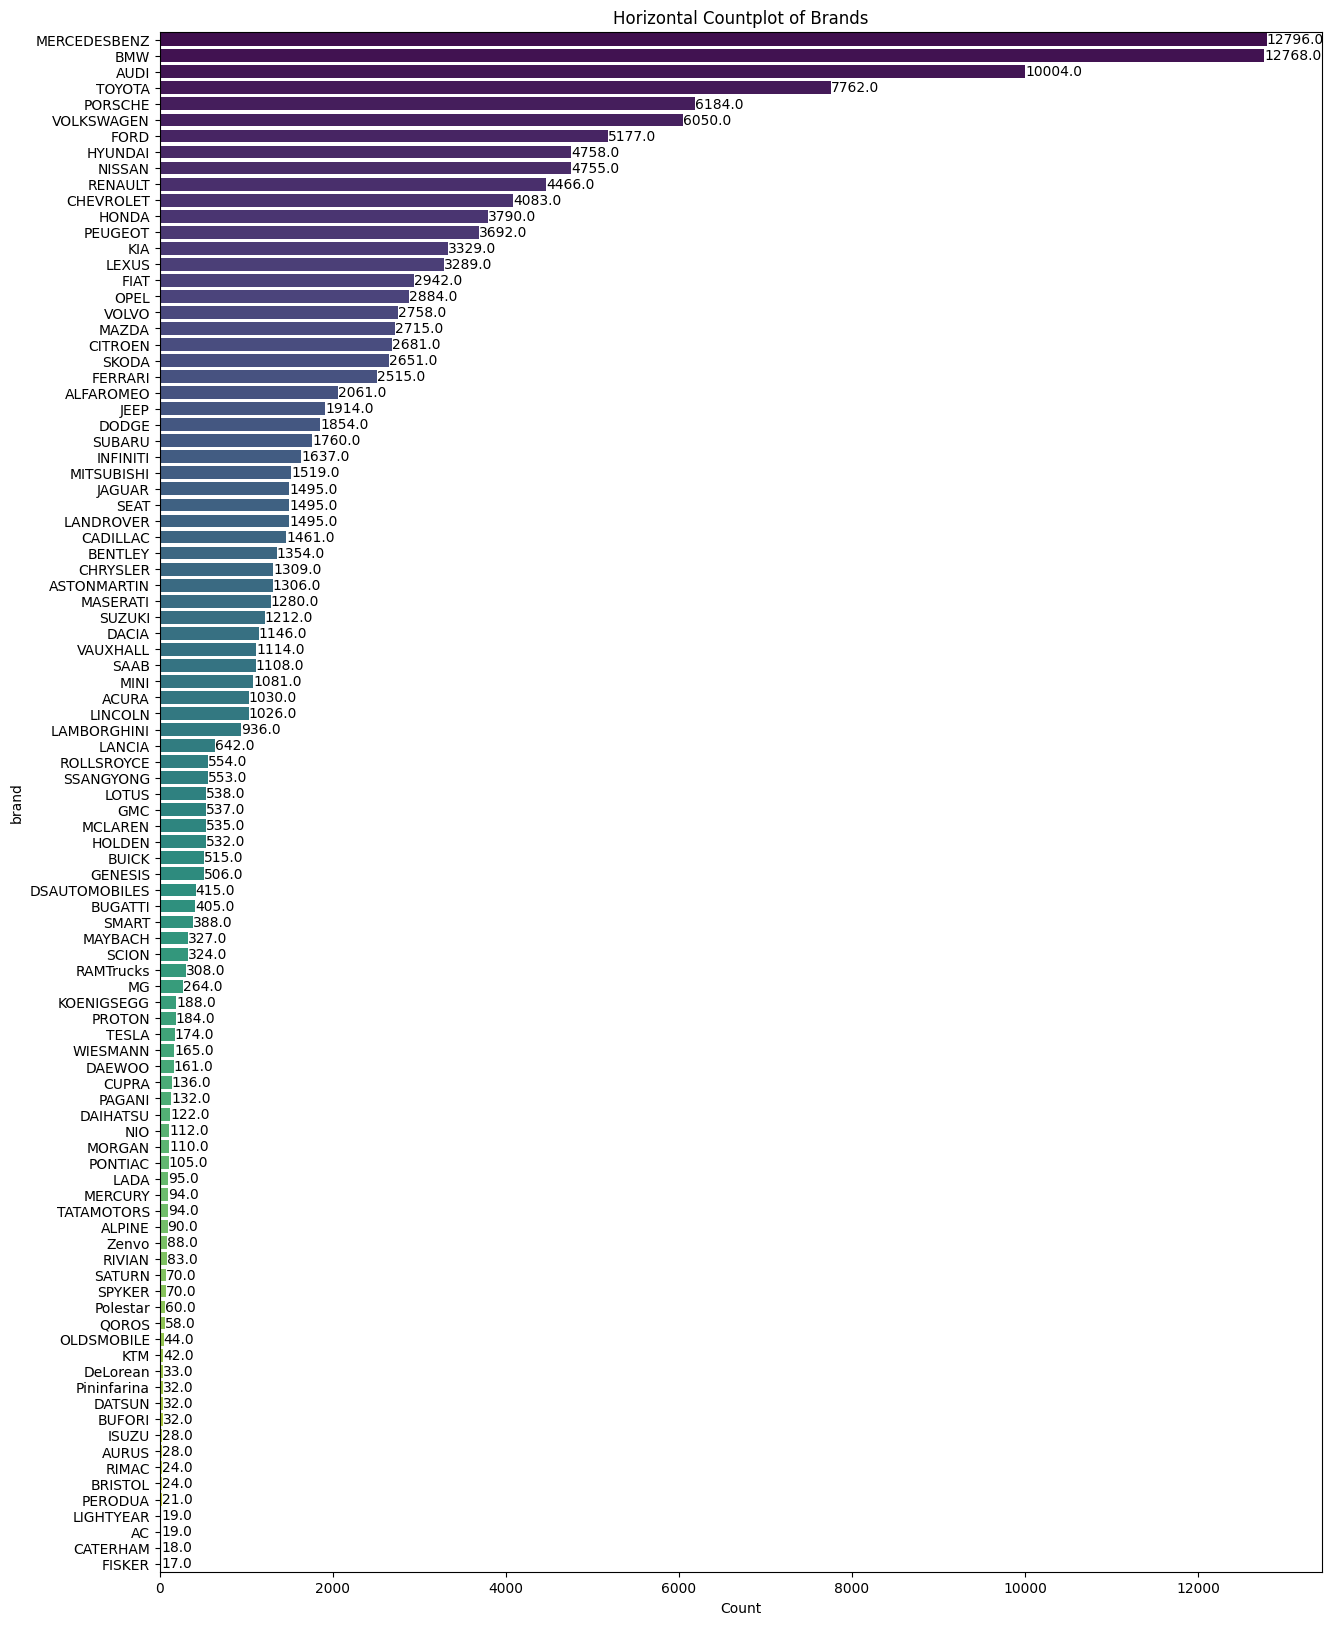

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

# Creating a horizontal countplot
ax = sns.countplot(y='brand', data=merged_df, palette='viridis', order=merged_df['brand'].value_counts().index)

plt.xlabel('Count')
plt.ylabel('brand')
plt.title('Horizontal Countplot of Brands')

# Displayong the count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()


### Sorting Brands by Class
- There are a large number of categories.
So, I'll be using domain Knowledge for reducing the number of categories into two.
- I will do this by dividing the car brands into LUXURY and MASS MARKET categories

In [30]:
# Creating a new column 'class' in merged_df
merged_df['class'] = merged_df['brand']

luxury_class = ['BUGATTI', 'ASTONMARTIN', 'FERRARI', 'MAYBACH', 'LAMBORGHINI',
                'MASERATI', 'BENTLEY', 'PORSCHE', 'MCLAREN', 'ROLLSROYCE', 'WIESMANN', 'Zenvo',
                'KOENIGSEGG', 'BMW', 'ALFAROMEO', 'AUDI', 'ACURA', 'MERCEDESBENZ', 'LEXUS',
                'LINCOLN', 'INFINITI', 'JAGUAR', 'LANDROVER',
                'CADILLAC', 'GENESIS', 'Polestar', 'DSAUTOMOBILES', 'FISKER', 'LOTUS', 'TESLA', 'AURUS', 'BUFORI',
                'PAGANI', 'SPYKER', 'ALPINE', 'RIMAC', 'RIVIAN', 'KTM']

# Using loc to update the 'class' column for luxury_class
merged_df.loc[merged_df['class'].isin(luxury_class), 'class'] = 'LUXURY'

mass_market_class = ['FIAT', 'SEAT', 'SUZUKI', 'CITROEN', 'KIA',
                     'HONDA', 'NISSAN', 'HYUNDAI', 'SSANGYONG',
                     'MAZDA', 'TATAMOTORS', 'CHEVROLET', 'SKODA',
                     'MITSUBISHI', 'GMC', 'FORD', 'TOYOTA', 'CHRYSLER', 'RENAULT',
                     'DAEWOO', 'DAIHATSU', 'DATSUN', 'OPEL', 'VAUXHALL', 'PROTON', 'ISUZU',
                     'SMART', 'SAAB', 'PERODUA', 'HOLDEN', 'DACIA', 'NIO', 'QOROS',
                     'SCION', 'VOLKSWAGEN', 'BUICK', 'SUBARU', 'VOLVO',
                     'CUPRA', 'MINI', 'PEUGEOT', 'JEEP', 'DODGE']

# Using loc to update the 'class' column for mass_market_class
merged_df.loc[merged_df['class'].isin(mass_market_class), 'class'] = 'MASS MARKET'

other_class = ['CATERHAM', 'DeLorean', 'OLDSMOBILE', 'SATURN', 'PONTIAC',
               'LANCIA', 'AC', 'BRISTOL', 'LADA',
               'MERCURY', 'MG', 'MORGAN', 'RAMTrucks']

# Using ~ to filter out rows in the 'other' class
merged_df = merged_df[~merged_df['class'].isin(other_class)]


The 'other' category was removed

In [31]:
merged_df.shape

(150963, 3)

In [32]:
merged_df

,image_url,brand,class
0,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY
1,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY
2,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY
3,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY
4,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY
...,...,...,...
152784,/content/train/VOLVO_XC70_V70XC_20002004/VOLVO...,VOLVO,MASS MARKET
152785,/content/train/VOLVO_XC70_V70XC_20002004/VOLVO...,VOLVO,MASS MARKET
152786,/content/train/VOLVO_XC70_V70XC_20002004/VOLVO...,VOLVO,MASS MARKET
152787,/content/train/VOLVO_XC70_V70XC_20002004/VOLVO...,VOLVO,MASS MARKET


The dataframe now has the LUXURY and MASSMARKET classes

### Encoding Target Column
I'll be manually encoding the target column

In [33]:
# Manually encoding
class_mapping = {'LUXURY': 1, 'MASS MARKET': 0}
merged_df['class_encoded'] = merged_df['class'].map(class_mapping)

<ipython-input-33-b369e714dcc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['class_encoded'] = merged_df['class'].map(class_mapping)


In [34]:
merged_df.head()

,image_url,brand,class,class_encoded
0,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY,1.0
1,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY,1.0
2,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY,1.0
3,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY,1.0
4,/content/train/AUDI_S6_Avant_2019Present/AUDI-...,AUDI,LUXURY,1.0


### Dropping NaNs

In [35]:
# Drop rows with NaN values in the 'class_encoded' column
merged_df = merged_df.dropna()


In [36]:
merged_df.shape

(150912, 4)

### Converting Encoded Column to Int

In [37]:
merged_df['class_encoded'] = merged_df['class_encoded'].astype(int)


<ipython-input-37-2cf2a90e58c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['class_encoded'] = merged_df['class_encoded'].astype(int)


### Viewing Class Distributions
I'll be doing this using a bar chart of percentages

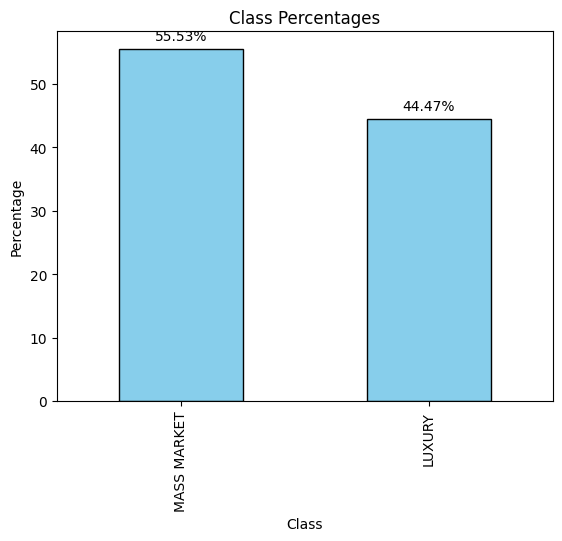

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Getting the class percentages
class_percentages = merged_df['class'].value_counts(normalize=True) * 100

# Plotting
class_percentages.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Percentages')

# Displaying the percentage values on top of the bars
for i, v in enumerate(class_percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


The classes exibhit a 45 -55% distribution ratio. The data is slightly imbalanced. However, there is no need to use over-/under-sampling , since the difference is not that significant (Shaw, 2021).

Shaw, Sayan. (2021). Re: What is the exact data sample ratio of every classes to declare a dataset suffering from a slight/severe class imbalance problem?. Retrieved from: https://www.researchgate.net/post/What_is_the_exact_data_sample_ratio_of_every_classes_to_declare_a_dataset_suffering_from_a_slight_severe_class_imbalance_problem/6107f144e7e50b12cc213ce3/citation/download.

# Subsetting the Data
The dataset is quite large and tends to cause RAM to crash. Thus, I will be subsetting the data by 90%. to 10% of its original size

In [39]:
df_subset = merged_df.sample(frac=0.1, random_state=42)
df_subset.head()

,image_url,brand,class,class_encoded
50974,/content/train/KIA_Sportage_HEV__2022Present/k...,KIA,MASS MARKET,0
33149,/content/train/LEXUS_GS_20002005/LEXUS-GS-3394...,LEXUS,LUXURY,1
20884,/content/train/MITSUBISHI_Outlander_2021Presen...,MITSUBISHI,MASS MARKET,0
21511,/content/train/KIA_Optima_Sportswagon_20162018...,KIA,MASS MARKET,0
80445,/content/train/SKODA_Karoq_2021Present/skoda-k...,SKODA,MASS MARKET,0


Viewing Distribution

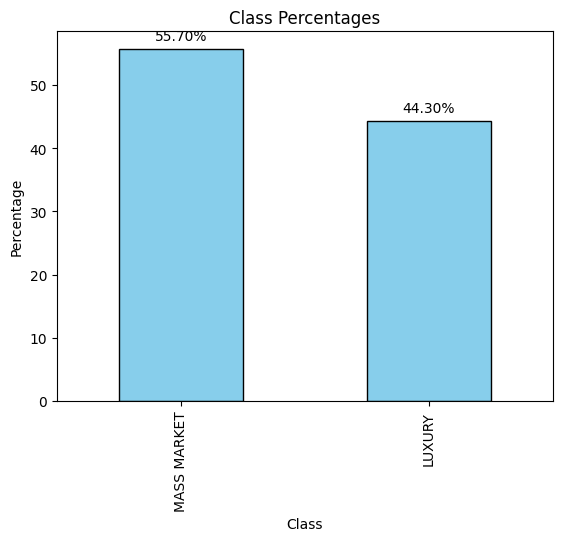

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

class_percentages = df_subset['class'].value_counts(normalize=True) * 100

class_percentages.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Percentages')

# Displaying the percentage values on top of the bars
for i, v in enumerate(class_percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()


The distribution of the target class is still the same at 45-55% ratio.
- Thus, there's no need to apply over- or under- sampling.

# Image Data Preprocessing

I'll be preprocessing the image data
- The input size is set to (64,64)
- The images are resized to a target size of (64, 64), converted to numpy arrays, and normalized so that pixel values are between 0 and 1. - The resulting images are stored in the array X.

In [41]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

X_paths = df_subset['image_url'].values
y_labels = df_subset['class_encoded'].values

# Loading and preprocessing the images
X = []
for path in X_paths:
    # try:
        img = tf.keras.preprocessing.image.load_img(path, target_size=(64, 64))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array /= 255.0  # Normalizing pixel values to be between 0 and 1
        X.append(img_array)

X = np.array(X)

# Checking shapes
print("X_train shape:", X.shape)
print("y_train_one_hot shape:", y_labels.shape)


X_train shape: (15091, 64, 64, 3)
y_train_one_hot shape: (15091,)


There are 15091 images, with a size of (64 X 64) and a staandard RGB, represented by the 3.

# Splitting
I'll be splitting the dataset into 4 parts:
- test images
- training images
- test labels
- train labels

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

# Modelling
- I've created a cnn_model function which takes in learning rate and dropout rate as parameters.
- The model is created using the Sequential API.
- Convolutional layers with 32, 64, and 128 filters, each followed by max-pooling layers, are defined to extract features from the input images.
- The Flatten layer is used to flatten the output from the convolutional layers.
- Two fully connected/ dense layers follow, with 256 units and ReLU activation in the first layer and a dropout layer with the specified dropout rate.
- The final Dense layer has a single unit with sigmoid activation function, which is suitable for binary classification.
- I've also compiled the model using an Adam optimizer is used with a clip value of 1.0.
- Binary cross-entropy was also chosen as the cost function, being suitable for binary classification tasks.

In [43]:
from tensorflow import keras
from tensorflow.keras import layers
import cv2
#from tensorflow.keras.constraints import ClipNorm
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


lr=0.001
dr=0.5

def cnn_model(learning_rate, dropout_rate):
    model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(1, activation='sigmoid')])

    # Compiling the model
    opt = keras.optimizers.Adam(clipvalue=1.0)
    model.compile(optimizer= opt,
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])

    return model

# Creating a Pipeline
I've created a pipeline, consistng of a single step named 'model', which is an instance of KerasClassifier
- KerasClassifier is a wrapper for using Keras models in scikit-learn workflows.
- The build_fn parameter in the KerasClassifier is set to a lambda function, which returns an instance of the cnn_model with specific hyperparameters (learning_rate and dropout_rate).

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('model', KerasClassifier(build_fn=lambda:cnn_model(learning_rate=lr, dropout_rate=dr)))
])

<ipython-input-44-262b06a414ec>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasClassifier(build_fn=lambda:cnn_model(learning_rate=lr, dropout_rate=dr)))


# Fitting
Fitting the pipeline to the data.
- Since pipeline does not accept 'epochs' parameter, I passed the parameters using the .named_steps method
- I've also used a callback with a patience of 7

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
history= pipeline.named_steps['model'].fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=early_stopping)


Epoch 1/30
302/302 [==============================] - 102s 330ms/step - loss: 0.6873 - accuracy: 0.5573 - val_loss: 0.6905 - val_accuracy: 0.5491
Epoch 2/30
302/302 [==============================] - 91s 302ms/step - loss: 0.6873 - accuracy: 0.5572 - val_loss: 0.6879 - val_accuracy: 0.5474
Epoch 3/30
302/302 [==============================] - 101s 334ms/step - loss: 0.6830 - accuracy: 0.5651 - val_loss: 0.6921 - val_accuracy: 0.5474
Epoch 4/30
302/302 [==============================] - 94s 311ms/step - loss: 0.6800 - accuracy: 0.5709 - val_loss: 0.6836 - val_accuracy: 0.5433
Epoch 5/30
302/302 [==============================] - 92s 304ms/step - loss: 0.6705 - accuracy: 0.5807 - val_loss: 0.6846 - val_accuracy: 0.5573
Epoch 6/30
302/302 [==============================] - 98s 324ms/step - loss: 0.6585 - accuracy: 0.6002 - val_loss: 0.6861 - val_accuracy: 0.5665
Epoch 7/30
302/302 [==============================] - 91s 303ms/step - loss: 0.6435 - accuracy: 0.6164 - val_loss: 0.6760 - val_

# Predictions

## Test Predictions
Predictions on the test dataset

In [47]:
test_pred = pipeline.predict(X_test)

95/95 [==============================] - 6s 62ms/step


Converting probabilities into labels (1 or 0)

In [48]:
thresholded_array = (test_pred >= 0.5).astype(int)

print(thresholded_array)


[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


## Train Predicting
Predictions on the train dataset

In [49]:
train_pred = pipeline.predict(X_train)

378/378 [==============================] - 32s 84ms/step


In [50]:
thresholded_array_2 = (train_pred >= 0.5).astype(int)

print(thresholded_array_2)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


# Evaluate

## Accuracy Score

### Test Accuracy
Calculating accuracy on the test set

In [51]:
#loss, accuracy = pipeline.evaluate(X_test, y_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, (thresholded_array))  # Assuming binary classification


### Train Accuracy
Calculating accuracy on the train set

In [52]:
#loss_train, acc_train = pipeline.evaluate(X_train, y_train)
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, (thresholded_array_2))  # Assuming binary classification

Comparing Test and train accuracies

In [53]:
print("Test accuracy:", test_acc)
print("Training accuracy:", train_acc)

Test accuracy: 0.5833057303742961
Training accuracy: 0.8730947647448641


The test accuracy of 0.58 indicates that the model correctly predicted the class  for approximately 58% of the test data. On the other hand, the training accuracy of 0.87 suggests that during the training phase, the model achieved a high accuracy of about 87% on the training data.

The model performed well on the training data, its accuracy is low on the test set. This suggests that the model might be overfitting the training data,

## Cross validation

## Training & Validation Curves
I will be creating loss and validation curves. Validation and Training Loss & Accuracy Graphs will help me analyze the performance and progress of a model during training. The graph typically displays two key metrics: loss and accuracy.

- The loss shows the difference between the predicted values and actual values
- The accuracy tells us about the overall accuracy of predictions.

- Training Loss: Shows us how well the model fits on the training data (Baeldung, 2023).

- Validation Loss: Shows us how well the model is generalizing.

- Training Accuracy: Shows the accuracy on the training data.

- Validation Accuracy: Shows the accuracy on the test dataset.



<ipython-input-54-159113e29c83>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training acc',c='r')
<ipython-input-54-159113e29c83>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', c='r')


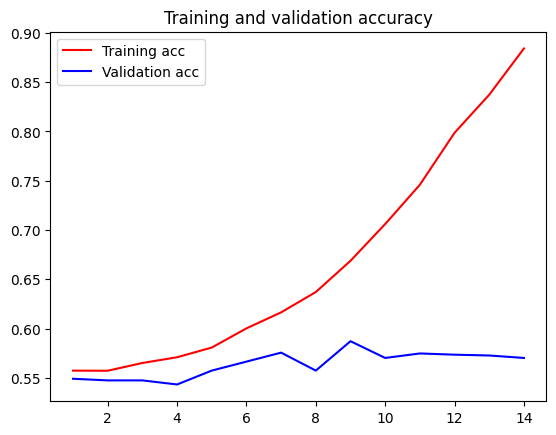

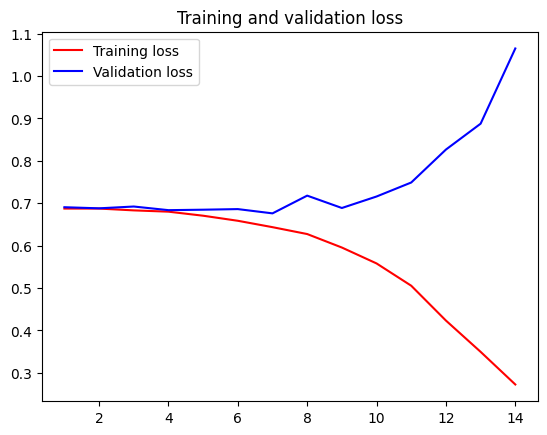

In [54]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc',c='r')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss', c='r')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#Code adapted from: https://www.kaggle.com/code/ngyptr/multi-class-classification-with-lstm

**Accuracy Curves**

The training accuracy increases with the number of epochs, while the validation accuracy remains relatively constant. This suggests that the model is overfitting the training data and is not generalizing well to the validation data .

**Loss Curves**

The training loss is decreasing while the validation loss is increasing. This suggests that the model is overfitting and is not generalizing well to new data.

## ROC Curves
I will be creating an ROC curve to analyze the data.

The Receiver Operating Characteristic (ROC) curve is used for evaluating the performance of a classification model.

The plot shows the relationship between the true positive rate (TPR) and the false positive rate (FPR).

- A high TPR indicates that the model is good at identifying true positives.

- A low FPR indicates that the model is good at not falsely labeling negatives as positives.

The ROC curve is plotted with TPR on the y-axis and FPR on the x-axis. An ideal ROC curve is one that hugs the top-left corner of the plot, because this would indicate high TPR and low FPR.

Along with the ROC curve, the area under the ROC curve (AUC) is a  metric used to determine the model's performance. AUC outputs a single numerical value, which represents the model's ability to discriminate between positive and negative samples. The AUC is measured between 0 and 1. A higher AUC (closer to 1) indicates better performance.

The ROC is typically used for evaluating the performance of a binary classification model.

95/95 [==============================] - 6s 67ms/step


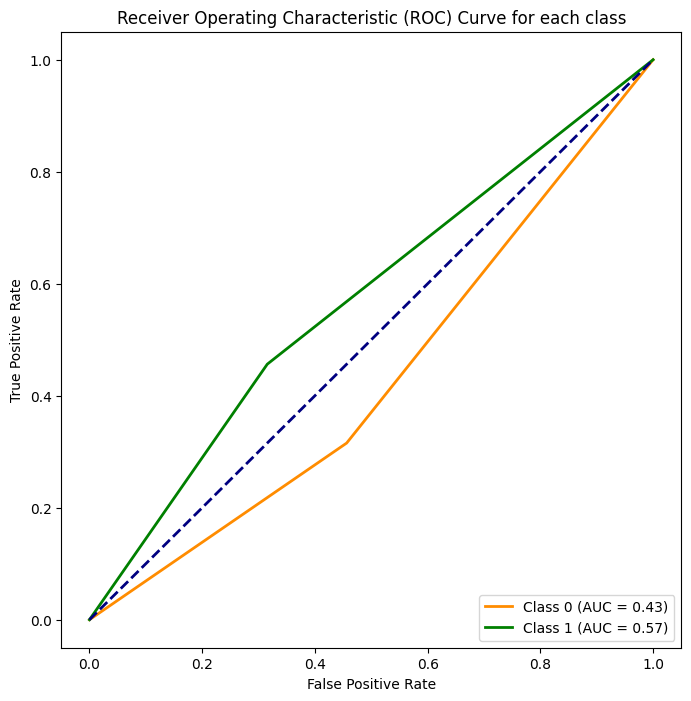

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = pipeline.predict(X_test).flatten()

# Calculating ROC curve for class 0
fpr_class_0, tpr_class_0, _ = roc_curve(y_test, y_probs, pos_label=0)
roc_auc_class_0 = auc(fpr_class_0, tpr_class_0)

# Calculating ROC curve for class 1
fpr_class_1, tpr_class_1, _ = roc_curve(y_test, y_probs, pos_label=1)
roc_auc_class_1 = auc(fpr_class_1, tpr_class_1)

# Plot ROC curves for both classes
plt.figure(figsize=(8, 8))
plt.plot(fpr_class_0, tpr_class_0, color='darkorange', lw=2, label=f'Class 0 (AUC = {roc_auc_class_0:.2f})')
plt.plot(fpr_class_1, tpr_class_1, color='green', lw=2, label=f'Class 1 (AUC = {roc_auc_class_1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()
# Code adapted from: https://www.statology.org/plot-multiple-roc-curves-python/;
# https://stackoverflow.com/a/70002535;
# https://www.geeksforgeeks.org/multiclass-receiver-operating-characteristic-roc-in-scikit-learn/

In this case, the AUC for class 0 is 0.43 and for class 0 is 0.57. The AUC for class 1 is quite low, which suggests that the classifier is not performing well for that class. However, the AUC for class 0 is higher, which suggests that the classifier is performing better for that class. The closer the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories

## Confusion Matrix
I will be creating a confusion matrix to understand my predictions better. While the accuracy and loss gave us information about the overall prediction ability of the model, the confusion matrix gives us more insight than just using the accuracy score. The confusion matrix shows us the proportion of correct or incorrect classifications as follows:

1. The number of True Positives (TP)
2. The number of False Positives (FP)
3. The number of False Negatives (FN)
4. The number of True Negatives (TN)

- TP: The model correctly predicted an image as belonging to a certain class
- FP: The model incorrectly predicted an image as belonging to a certain class when it does not
- FN: The model incorrectly predicted an image as not belonging to a certain class when it does
- TN: The model correctly predicted an image as not belonging to a certain class

array([[1150,  530],
       [ 728,  611]])

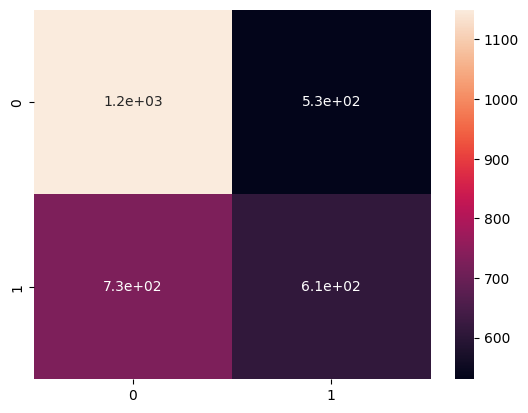

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, thresholded_array, labels=range(2))
sns.heatmap(cm, annot=True)
cm

- A True Negative of 1150 means that the model correctly predicted 1150 images of mass-market cars as mass-market.
- A False Positive of 530 means that 530 instances where the model predicted images of luxury cars as mass-market.
- A False Negative of 728 means that the model predicted 728 images of mass-market cars as luxury.
- True Positive of 611 means that the model correctly predicted 611 images of luxury cars as luxury.
- Class 0 has higher true positives than class 1, meaning that it has performed better than class 1.

## Classification Report

I will calculate the Classification report. The advantage of the classification report is that it provides a summary of the model's performance across different classes, according to the metrics of precision, recall, and F1-score.

The classification report uses the results of the confusion matrix.
- Precision is the ratio of the number of samples actually belonging to the positive class and all the samples that were predicted to be of the positive class.
Precision= True Positives/(False Positives+True Positives)

- Recall is the ratio of the number of samples predicted correctly to be belonging to the positive class and all the samples that actually belong to the positive class.
Recall = True Positives/(False Negatives+True Positives)
- f1 Score is the harmonic mean of the recall and precision scores from the positive class. The f1-score takes into account both the precision and recall, and a high f1-score (closer to 1) implies that both the precision and recall are high.

In [58]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, thresholded_array)
print(cr)

              precision    recall  f1-score   support

           0       0.61      0.68      0.65      1680
           1       0.54      0.46      0.49      1339

    accuracy                           0.58      3019
   macro avg       0.57      0.57      0.57      3019
weighted avg       0.58      0.58      0.58      3019



- Class 0 appears to be performing better than class 1
- **Precision:**
  - For Class 0 (Mass-Market), the precision is 0.61, indicating that when the model predicts an image as a mass-mrket car, it is correct about 61% of the time.
  - For Class 1 (Luxury), the precision is 0.54, indicating that when the model predicts an image as a luxury car, it is correct about 54% of the time.

- **Recall (Sensitivity):**
  - For Class 0 (Mass-Market), the recall is 0.68, indicating that the model is able to correctly identify about 68% of the actual mass-market cars.
  - For Class 1 (Luxury), the recall is 0.46, indicating that the model is able to correctly identify about 46% of the actual luxury cars.

- **F1-Score:**
  - For Class 0 (Mass-market), the F1-score is 0.65, representing a balance between precision and recall for mass-market cars.
  - For Class 1 (Luxury), the F1-score is 0.49, representing a balance between precision and recall for luxury cars.

- **Accuracy:**
  - The overall accuracy of the model is 0.58, indicating that about 58% of the predictions are correct.

# Hyperparameter Tuning

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model. I will be performing hyperparameter tuning in order to improve my model from overfitting. Specifically, I will be focusing on adjusting batch size, learning rate, and dropout rate. This is because:
  - the model has been found to be overfitting
  - thus, applying regularization, such as adjusting the dropout rate can improve overfitting
  - decreasing the learning rate has the potential of improving overfitting
  - decreasing batch size also has the potential of improving overfitting

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Pipeline
pipeline_ht = Pipeline([
    ('model', KerasClassifier(build_fn=cnn_model, epochs=1))
])

# Hyperparameter tuning
param_grid = {
    'model__batch_size': [16, 32, 512],
    'model__learning_rate': [0.001, 0.01],
    'model__dropout_rate': [0.1, 0.3],
}
# Grid Search
grid = GridSearchCV(pipeline_ht, param_grid=param_grid, cv=2, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

best_batch_size = grid_result.best_params_['model__batch_size']
best_dropout_rate = grid_result.best_params_['model__dropout_rate']
best_learning_rate = grid_result.best_params_['model__learning_rate']

# Printing the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

#Code adapted from: https://www.youtube.com/watch?v=HdlDYng8g9s&t=413s
# https://stats.stackexchange.com/questions/509950/implementing-automated-hyperparameter-tuning-within-a-manual-cross-validation-lo

<ipython-input-59-7ba2466d1275>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasClassifier(build_fn=cnn_model, epochs=1))


755/755 [==============================] - 122s 159ms/step - loss: 0.6888 - accuracy: 0.5533
Best Parameters:  {'model__batch_size': 16, 'model__dropout_rate': 0.1, 'model__learning_rate': 0.001}
Best Accuracy:  0.5571570576540755


Displaying the best parameters according to hyperparameter tuning:

In [60]:
print("Best batch Size:", best_batch_size)
print("Best Learning Rate:", best_learning_rate)
print("Best Dropout_rate", best_dropout_rate)

Best batch Size: 16
Best Learning Rate: 0.001
Best Dropout_rate 0.1


# Retraining

I will now retrain the model with the new values. I will do this by creating a new pipeline containing the updated values.

In [61]:
pipeline_retrained = Pipeline([ ('model_retrained', KerasClassifier(build_fn=lambda:cnn_model(learning_rate=best_learning_rate, dropout_rate=best_dropout_rate)))
])

<ipython-input-61-c6f2a79d41ef>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pipeline_retrained = Pipeline([ ('model_retrained', KerasClassifier(build_fn=lambda:cnn_model(learning_rate=best_learning_rate, dropout_rate=best_dropout_rate)))


In [62]:
history_retrained= pipeline_retrained.named_steps['model_retrained'].fit(X_train, y_train, epochs=30, batch_size=best_batch_size,validation_split=0.2, callbacks=early_stopping)


Epoch 1/30
604/604 [==============================] - 107s 175ms/step - loss: 0.6885 - accuracy: 0.5582 - val_loss: 0.6873 - val_accuracy: 0.5474
Epoch 2/30
604/604 [==============================] - 102s 169ms/step - loss: 0.6851 - accuracy: 0.5584 - val_loss: 0.6849 - val_accuracy: 0.5553
Epoch 3/30
604/604 [==============================] - 104s 172ms/step - loss: 0.6776 - accuracy: 0.5712 - val_loss: 0.6927 - val_accuracy: 0.5627
Epoch 4/30
604/604 [==============================] - 103s 171ms/step - loss: 0.6704 - accuracy: 0.5847 - val_loss: 0.6811 - val_accuracy: 0.5536
Epoch 5/30
604/604 [==============================] - 102s 169ms/step - loss: 0.6550 - accuracy: 0.6061 - val_loss: 0.6796 - val_accuracy: 0.5640
Epoch 6/30
604/604 [==============================] - 104s 172ms/step - loss: 0.6343 - accuracy: 0.6375 - val_loss: 0.6875 - val_accuracy: 0.5652
Epoch 7/30
604/604 [==============================] - 107s 177ms/step - loss: 0.5978 - accuracy: 0.6696 - val_loss: 0.6953 -

## Accuracy

In [63]:
test_pred_retrained = pipeline_retrained.predict(X_test)

thresholded_array_retrained= (test_pred_retrained >= 0.5).astype(int)
print(thresholded_array_retrained)

from sklearn.metrics import accuracy_score
test_acc_retrained = accuracy_score(y_test, (thresholded_array_retrained))  # Assuming binary classification


95/95 [==============================] - 7s 74ms/step
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [64]:
test_acc_retrained


0.5776747267307055

In [65]:
train_pred_retrained = pipeline_retrained.predict(X_train)

thresholded_train_retrained= (train_pred_retrained >= 0.5).astype(int)
print(thresholded_train_retrained)

train_acc_retrained = accuracy_score(y_train, (thresholded_train_retrained))  # Assuming binary classification

378/378 [==============================] - 32s 85ms/step
[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [66]:
train_acc_retrained

0.888585155732273

The train accuracy is 88% and the test accuracy is 57%, suggesting that the model is overfitting

## Loss/Accuracy Curves

<ipython-input-67-5420b84e6f07>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs2_rt, acc2_rt, 'b', label='Training acc',c='r')
<ipython-input-67-5420b84e6f07>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs2_rt, loss2_rt, 'b', label='Training loss', c='r')


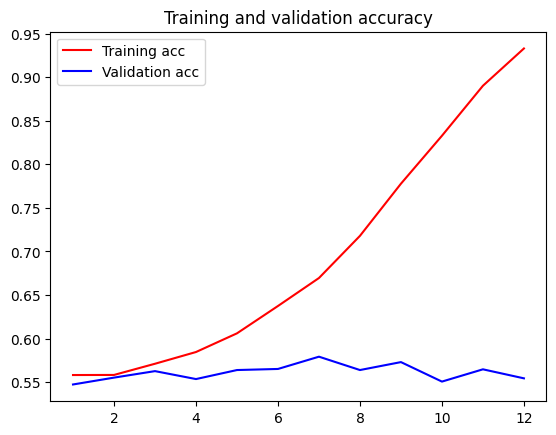

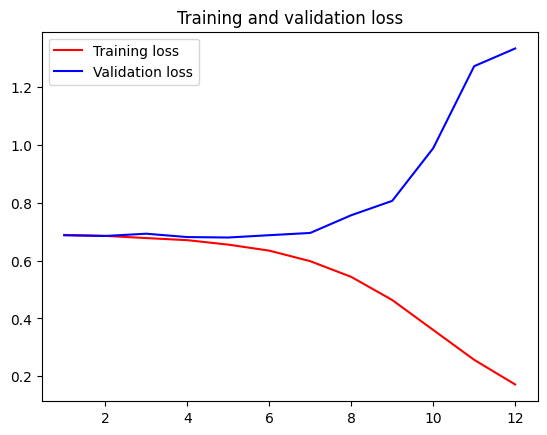

In [67]:
import matplotlib.pyplot as plt

acc2_rt = history_retrained.history['accuracy']
val_acc2_rt= history_retrained.history['val_accuracy']
loss2_rt = history_retrained.history['loss']
val_loss2_rt = history_retrained.history['val_loss']

epochs2_rt = range(1, len(acc2_rt) + 1)

plt.plot(epochs2_rt, acc2_rt, 'b', label='Training acc',c='r')
plt.plot(epochs2_rt, val_acc2_rt, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2_rt, loss2_rt, 'b', label='Training loss', c='r')
plt.plot(epochs2_rt, val_loss2_rt, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#Code adapted from: https://www.kaggle.com/code/ngyptr/multi-class-classification-with-lstm

**Accuracy Curves**
The training accuracy increases with the number of epochs, while the validation accuracy remains relatively constant. This suggests that the model is still overfitting and there has not been any improvement in the model.

**Loss Curves**
The training loss is decreasing while the validation loss is increasing. This suggests that the model is overfitting.

## ROC Curves

95/95 [==============================] - 9s 90ms/step


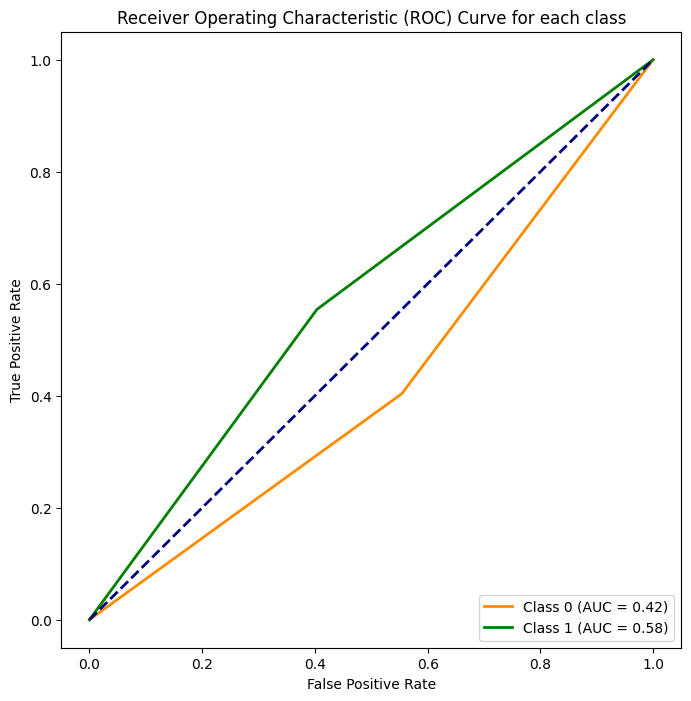

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
miy_probs = pipeline_retrained.predict(X_test).flatten()

# Calculate ROC curve for class 0
mifpr_class_0, mitpr_class_0, _ = roc_curve(y_test, miy_probs, pos_label=0)
miroc_auc_class_0 = auc(mifpr_class_0, mitpr_class_0)

# Calculate ROC curve for class 1
mifpr_class_1, mitpr_class_1, _ = roc_curve(y_test, miy_probs, pos_label=1)
miroc_auc_class_1 = auc(mifpr_class_1, mitpr_class_1)

# Plot ROC curves for both classes
plt.figure(figsize=(8, 8))
plt.plot(mifpr_class_0, mitpr_class_0, color='darkorange', lw=2, label=f'Class 0 (AUC = {miroc_auc_class_0:.2f})')
plt.plot(mifpr_class_1, mitpr_class_1, color='green', lw=2, label=f'Class 1 (AUC = {miroc_auc_class_1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()

# Code adapted from: https://www.statology.org/plot-multiple-roc-curves-python/;
# https://stackoverflow.com/a/70002535;
# https://www.geeksforgeeks.org/multiclass-receiver-operating-characteristic-roc-in-scikit-learn/


The AUC for class 1 is 0.58 and for class 1 is 0.43. The AUC for class 1 is quite low, which suggests that the classifier is not performing well for that class. However, the AUC for class 0 is higher, which suggests that the classifier is performing better for that class. The closer the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

## Classification Report

In [69]:
from sklearn.metrics import classification_report
cr_retrained = classification_report(y_test, thresholded_array_retrained)
print(cr_retrained)

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      1680
           1       0.52      0.55      0.54      1339

    accuracy                           0.58      3019
   macro avg       0.57      0.58      0.57      3019
weighted avg       0.58      0.58      0.58      3019



- Class 0 still appears to be performing better than class 1
- **Precision:**
  - For Class 0 (Mass-Market), the precision is 0.63, indicating that when the model predicts an image as a mass-mrket car, it is correct about 63% of the time.
  - For Class 1 (Luxury), the precision is 0.52, indicating that when the model predicts an image as a luxury car, it is correct about 52% of the time.

- **Recall (Sensitivity):**
  - For Class 0 (Mass-Market), the recall is 0.60, indicating that the model is able to correctly identify about 60% of the actual mass-market cars.
  - For Class 1 (Luxury), the recall is 0.55, indicating that the model is able to correctly identify about 55% of the actual luxury cars.

- **F1-Score:**
  - For Class 0 (Mass-market), the F1-score is 0.61, representing a balance between precision and recall for mass-market cars.
  - For Class 1 (Luxury), the F1-score is 0.54, representing a balance between precision and recall for luxury cars.

- **Accuracy:**
  - The overall accuracy of the model is 0.58, indicating that about 58% of the predictions are correct. This has decreased slightly from the previous model.

## Confusion Matrix

array([[1002,  678],
       [ 597,  742]])

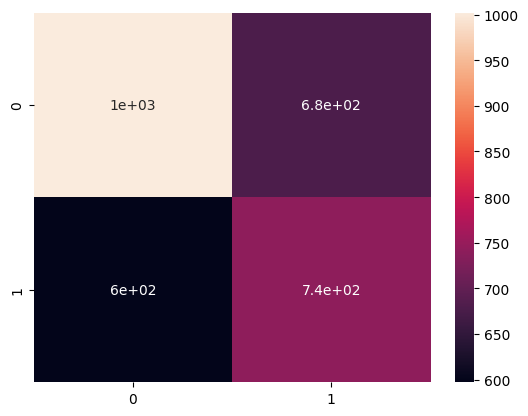

In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_retrained=confusion_matrix(y_test, thresholded_array_retrained, labels=range(2))
sns.heatmap(cm_retrained, annot=True)
cm_retrained

- Class 0 has a higher number of true positives than class 1, meaning that class 0 has more elements that been correctly classified, and is thus performing better than class 1.

- A True Positive of 1002 represents the number of luxury car images that were correctly classified as luxury.

- A True Negative of 742 represents the number of mass-market car images that were correctly classified as mass-market.

- A False Positive of 678 indicates the number of mass-market car images that were incorrectly classified as luxury.

- A False Negative of 597 indicates the number of luxury car images that were incorrectly classified as mass-market